In [1]:
!pip install pystac-client planetary_computer pandas geopandas matplotlib folium mapclassify rich rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 14.4 MB/s eta 0:00:00


# TES2025 Workshop 3 - Satellite Data Analysis for Urban Expansion with Python

## 1. Remote Sensing for Urban Applications and Case Studies

Before begining the workshop, there are some important basics that help you understand where we are going to do. Start with surf the remote sensing map application and examine what satellite imagery is...

In [ ]:
%%html
<iframe src="https://browser.dataspace.copernicus.eu/?zoom=12&lat=48.693412&lng=6.183388&themeId=DEFAULT-THEME&visualizationUrl=U2FsdGVkX190XDZr9zCr3DBTgPBAH3Nu1o8rL6nnQ46vYZ4psm7Aqzu%2B%2BcSwIhdyOsTcGSq%2F%2BYa%2FER61rr0xSfExW6LW9xV0NlnSFD%2Bw06ZIuHb9a0%2F%2BUGlAIGwn5oAx&datasetId=S2_L2A_CDAS&fromTime=2024-05-27T00%3A00%3A00.000Z&toTime=2024-11-27T23%3A59%3A59.999Z&layerId=2_FALSE_COLOR&demSource3D=%22MAPZEN%22&cloudCoverage=30&dateMode=MOSAIC" width="100%" height="640"></iframe>

### Remote Sensing Basics

Sattellite Imagery or Remote Sensing, they are iterally same thing.

#### Observation Satellite

<a href="https://sigmaearth.com/basics-of-remote-sensing-and-gis/">
<img src="https://github.com/thanthamky/tes-urban/blob/main/img/1_1-RSbasic.png?raw=1" alt="drawing" width="100%"/>
</a>

#### Sensing Spectrum

Since remote sensing satellite is similar to orbitally flying camera around the earth. It overcome normal RGB camera that their sensors are able to sense wider range of wavelength or let's say Red, Green, Blue, Near-Infared, Short-wave Infared and etc. This enables capabilities of remote sensing data visibly see differences of objects on the earth surface. e.g. Vegetation density, Built-up surface composition.


<a href="https://landscape.satsummit.io/analysis/band-combinations.html">
<img src="https://github.com/thanthamky/tes-urban/blob/main/img/1_spectralbands.png?raw=1" alt="drawing" width="100%"/>
</a>

Although there are many sensing spectral types, we can make them visualize in different ways to enhance visibility of some specific land surface in other word.


In [ ]:
%%html
<iframe src="https://viewer.esa-worldcover.org/worldcover/?language=en&bbox=98.4654688429876,18.5452026721685,99.3282482076887,19.037068969886974&overlay=false&bgLayer=OSM&date=2024-11-27&layer=WORLDCOVER_2021_MAP" width="100%" height="640"></iframe>

## 2. Satellite Data Exploration

In [ ]:
#!pip install pystac_client planetary_computer geopandas rich rasterio matplotlib seaborn tabulate

import pystac_client
import planetary_computer

import matplotlib.pyplot as plt

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

import rich.table

import rasterio
import matplotlib.pyplot as plt
import numpy as np


It is better to explore and familiarize the satellite data using actual data. In order to access satellite imagery data, most easiest way is to get it from open STAC collection. Additionally, we can easily use common HTTP request methods to retrieve the dataset

In [ ]:
stac_endpoint = 'https://planetarycomputer.microsoft.com/api/stac/v1'

collection_name = 'landsat-c2-l2'

area_of_interest = [98.919831,18.754418,99.049607,18.819261]

date_search = "2019-12-01/2019-12-31"

max_cloud_percentage = 30

If you do not have idea to locate your area of interest, use this web site to gather the coordinate box

<a href="http://bboxfinder.com/">BBOX Finder Web</a>

To search for available dataset, implement code below

In [ ]:
catalog = pystac_client.Client.open(
    stac_endpoint,
    modifier=planetary_computer.sign_inplace,
)

items = catalog.search(collections=[collection_name],
                       bbox=area_of_interest,
                       datetime=date_search,
                       query={"eo:cloud_cover": {"lt": max_cloud_percentage}}).item_collection()

The searching results are in list of objects. It is convertible to dataframe format for more visualization

In [ ]:
df = gpd.GeoDataFrame.from_features(items.to_dict(), crs="epsg:4326").to_markdown()
print(df)

|    | geometry                                                                                                                      |   gsd | created                     | sci:doi          | datetime                    | platform   |   proj:epsg | proj:shape   | description                  | instruments     |   eo:cloud_cover | proj:transform                               |   view:off_nadir |   landsat:wrs_row | landsat:scene_id      |   landsat:wrs_path |   landsat:wrs_type |   view:sun_azimuth | landsat:correction   |   view:sun_elevation |   landsat:cloud_cover_land |   landsat:collection_number | landsat:collection_category   |
|---:|:------------------------------------------------------------------------------------------------------------------------------|------:|:----------------------------|:-----------------|:----------------------------|:-----------|------------:|:-------------|:-----------------------------|:----------------|-----------------:|:--------------------------

For each dataset object, there are vartious __Asset Key__ and __Description__ fields to access data from provided URL

In [ ]:
table = rich.table.Table("Asset Key", "Description")

for asset_key, asset in items[0].assets.items():
    table.add_row(asset_key, asset.title)

table

┏━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Asset Key        ┃ Description                                                          ┃
┡━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ qa               │ Surface Temperature Quality Assessment Band                          │
│ ang              │ Angle Coefficients File                                              │
│ red              │ Red Band                                                             │
│ blue             │ Blue Band                                                            │
│ drad             │ Downwelled Radiance Band                                             │
│ emis             │ Emissivity Band                                                      │
│ emsd             │ Emissivity Standard Deviation Band                                   │
│ trad             │ Thermal Radiance Band                                                │
│ urad             │ Upwelled Radiance Band                                               │
│ atran            │ Atmospheric Transmittance Band                                       │
│ cdist            │ Cloud Distance Band                                                  │
│ green            │ Green Band                                                           │
│ nir08            │ Near Infrared Band 0.8                                               │
│ lwir11           │ Surface Temperature Band                                             │
│ swir16           │ Short-wave Infrared Band 1.6                                         │
│ swir22           │ Short-wave Infrared Band 2.2                                         │
│ coastal          │ Coastal/Aerosol Band                                                 │
│ mtl.txt          │ Product Metadata File (txt)                                          │
│ mtl.xml          │ Product Metadata File (xml)                                          │
│ mtl.json         │ Product Metadata File (json)                                         │
│ qa_pixel         │ Pixel Quality Assessment Band                                        │
│ qa_radsat        │ Radiometric Saturation and Terrain Occlusion Quality Assessment Band │
│ qa_aerosol       │ Aerosol Quality Assessment Band                                      │
│ tilejson         │ TileJSON with default rendering                                      │
│ rendered_preview │ Rendered preview                                                     │
└──────────────────┴──────────────────────────────────────────────────────────────────────┘

For example, most useful of asset is __preview rendered__ which is an image of RGB to display. Also, use item number __2__ to visualize

In [ ]:
item_index = 2
preview_asset_name = 'rendered_preview'


Show Rendered map by this code

In [ ]:
with rasterio.open(items[item_index].assets[preview_asset_name].href) as src:

    image_data = src.read().transpose(1,2,0)

plt.figure(figsize=(10,10))
plt.imshow(image_data)

plt.title('Preview Rendered')

plt.show()

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:356: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


The image shows in the output cell which consistent with human eyes or Google Satellite Map. Noted that this image show is not interactive, It is for just rough checking purpose to visually validate the image data

Additionally, try to observe the color histogram to explain how the color and pixel value are

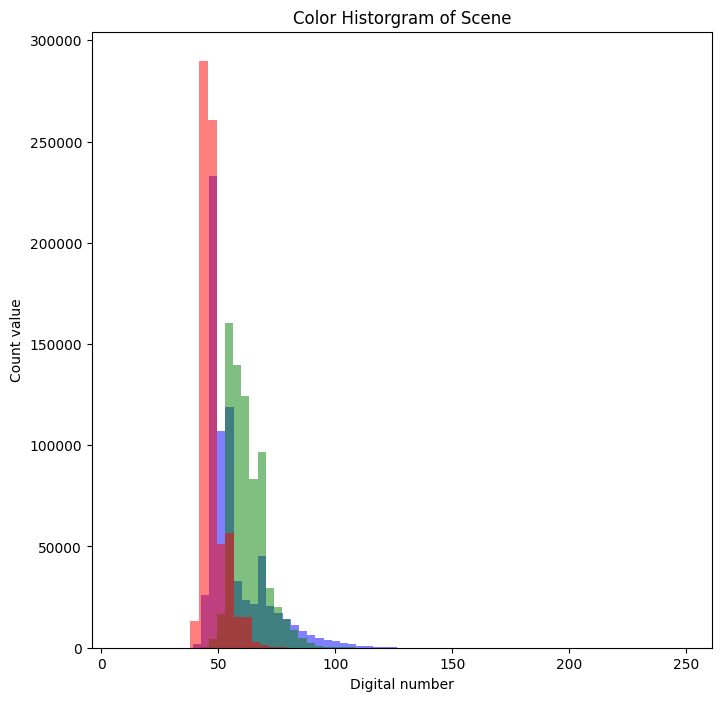

In [ ]:

plt.figure(figsize=(8, 8))

with rasterio.open(items[item_index].assets['rendered_preview'].href) as src:

    data = src.read()

    plt.hist(data[0][data[0] > 0], bins=64, color='blue', alpha=0.5)
    plt.hist(data[1][data[1] > 0], bins=64, color='green', alpha=0.5)
    plt.hist(data[2][data[2] > 0], bins=64, color='red', alpha=0.5)

plt.xlabel('Digital number')
plt.ylabel('Count value')

plt.title('Color Historgram of Scene')

plt.show()



## 3. Spectral Signature of Land Use Land Cover Types

Since we know how satellite image looks like, this step is to introduce remote sensing index.

<br>

Remote sensing index is an imagery task to do calculation on pixel value in same location coressponding to difference of spectral quantity.


See this figure below. Observation satellite can sense wide range of wavelength rather human eyes from visible light until mid-infrared light. This enables to better recoginition capabiolities for differentiating spectrum of various objects ont he earth surface.

<a href="https://landscape.satsummit.io/analysis/band-combinations.html">
<img src="https://giscience.github.io/gis-training-resource-center/_images/en_m8_rs_specsigs.jpeg" alt="drawing" width="100%"/>
</a>

Human can only see in Visible light (1-B, 2-G, 3-R chennels) which many objects may represent similar together that is difficult to classify. On the other hand, __NIR__ (4), __SWIR1__ (5) and __SWIR2__ (7) show big differences among spectrum. To prove this, next hands on is to show our assumption based on actual location on the map

In [ ]:
import rasterio
from pyproj import Transformer

def sample_raster_values(raster_urls, coord):

    values = []

    for url in raster_urls:

      with rasterio.open(url) as src:

        raster_crs = src.crs

        x, y = Transformer.from_crs("EPSG:4326", f"EPSG:{raster_crs.to_epsg()}", always_xy=True).transform(coord[0], coord[1])

        for val in src.sample([(x, y)]):
            values.append(val.item())

    return values


After we we declare the function of band value extraction by location. we create a list of catalog to do it

In [ ]:
# Example usage:
raster_urls = [
  items[item_index].assets['blue'].href,
  items[item_index].assets['green'].href,
  items[item_index].assets['red'].href,
  items[item_index].assets['nir08'].href,
  items[item_index].assets['swir16'].href,
  items[item_index].assets['swir22'].href,
]

land_cover_coord = {
  'urban' : (98.982938, 18.792044),
  'water' : (99.120025, 18.931569),
  'forest' : (98.889118, 18.829645),
  'crop' : (99.005117, 18.854228),
}


Examine the location of

In [ ]:
point_locations = pd.DataFrame([
    {'lulc': lulc, 'geometry': Point(xy)} for lulc, xy in land_cover_coord.items()
])

# Convert to GeoDataFrame
point_locations = gpd.GeoDataFrame(point_locations, geometry='geometry', crs="EPSG:4326")


Show Interactive Map

In [ ]:
point_locations.explore(tiles='https://mt1.google.com/vt/lyrs=y&x={x}&y={y}&z={z}',
                        attr='Google Satellite Hybrd',
                        style_kwds={"radius": 12})

Then, we extract the signature values from 6 image path of the bands

In [ ]:
spectral_sigs = {}

for lc, coord in land_cover_coord.items():
    spectral_sigs[lc] = sample_raster_values(raster_urls, coord)

Check the spectral signature values

In [ ]:
spectral_sigs

{'urban': [15435, 16524, 17745, 18658, 23255, 21589],
 'water': [8338, 8610, 8234, 7872, 7452, 7359],
 'forest': [7652, 8248, 7884, 15659, 10944, 8828],
 'crop': [9587, 10591, 11169, 12966, 11724, 9893]}

However, some people may question about what the number in image is. Value in a pixel called __Digital Number (DN)__ which is linearly numerical indicator to reflectance value.

__Reflectance__ is ratio value of reflection divided by full energy of sun irradiance to the surface. By documentation of [USGS](https://www.usgs.gov/landsat-missions/landsat-collection-2-level-2-science-products), we can easily convert by this simple formula

$$
Reflectance = DN * scalefactor + offset
$$


to come up with a single function, we can use lambda for making this

In [ ]:
calc_reflectance = lambda dn: dn * 0.0000275 - 0.2

Try to test on it

In [ ]:
calc_reflectance(spectral_sigs['forest'][3])

0.2306225

Then, implement this function to every DN in spectral signature values

In [ ]:
for lc, sp in spectral_sigs.items():
    spectral_sigs[lc] = [calc_reflectance(dn) for dn in sp]

spectral_sigs

{'urban': [0.2244625,
  0.25441,
  0.2879875,
  0.31309499999999996,
  0.43951250000000003,
  0.3936975],
 'water': [0.029294999999999988,
  0.036775,
  0.026434999999999986,
  0.016479999999999995,
  0.00492999999999999,
  0.0023724999999999996],
 'forest': [0.010429999999999995,
  0.02682000000000001,
  0.01680999999999999,
  0.2306225,
  0.10096,
  0.04277],
 'crop': [0.06364249999999999,
  0.09125250000000001,
  0.1071475,
  0.156565,
  0.12241000000000002,
  0.0720575]}

For more understanding, try to plot those signatures by pyplot

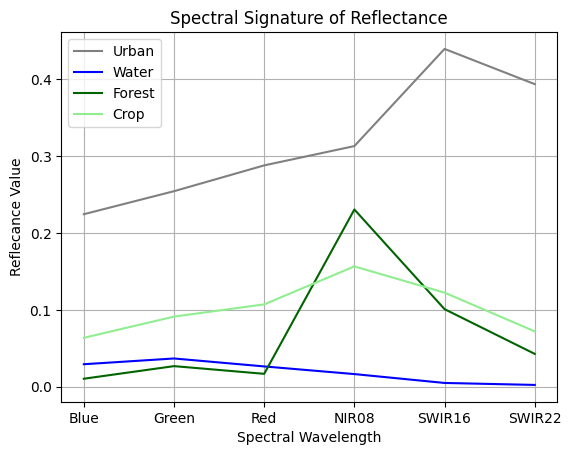

In [ ]:
plt.plot(spectral_sigs['urban'], color='gray', label='Urban')
plt.plot(spectral_sigs['water'], color='blue', label='Water')
plt.plot(spectral_sigs['forest'], color='darkgreen', label='Forest')
plt.plot(spectral_sigs['crop'], color='lightgreen', label='Crop')

plt.legend()
plt.xlabel('Spectral Wavelength')
plt.ylabel('Reflecance Value')
plt.title('Spectral Signature of Reflectance')
plt.grid()

plt.xticks(np.arange(6), ['Blue', 'Green', 'Red', 'NIR08', 'SWIR16', 'SWIR22'])

plt.show()

Please remember this plot, this is a major knowledge of guys who learning about remote sensing int he future

## 4. Remote Sensing Index

From sepctral signature chart, there are obvious differences among land cover type due to their chemical composition on the surface. The next challenge is how can we quantify some value to indicate existance of some object on the surface. <br>

This was solved by using Indexing image. If you search for remote sensing with vegetation or urban even flood occurances, you may see vocaborary like _NDVI_, _NDWI_ or _NDBI_. Those applied __Normalzied Diferrence__ technique with fractional math calculation using 2 or more sepctral values to be new number like

$$
NDVI = \frac{NIR - Red}{NIR + Red}
$$

For more explanation, this figure shows why to choose NIR and Red as a calculation pair. Chrollophylls on plant's leaves absorb some of red wavelength but relfect most of Near-infrared energy. Therefore, there is a big difference between NIR and Red energy to indicate vegetation existing on the surface. So that, Difference and Normalization are employed to quanify difference level to determine vegetation on the surface.

<a href="https://hakimabdi.com/blog/birth-of-the-normalized-difference-vegetation-index-and-the-paradigm-shift-in-satellite-remote-sensing-of-the-environment">
<img src="https://images.squarespace-cdn.com/content/v1/5aa28a5675f9eefe0a8c22df/4ec898c3-1d79-4eb3-b82b-a150465fe8df/NDVI_Slide.jpg" alt="drawing" width="100%"/>
</a>



This formula is __Normalized Difference Vegetation Index (NDVI)__ which help researcher to identify existence of "Chrollophyll Density" on the surface. Try to understant by this hands on

In [ ]:
# Calculate NDVI, NDWI, NDBI
from rasterio import Affine
from rasterio.enums import Resampling
import numpy as np

# Open the red band raster
with rasterio.open(items[item_index].assets['red'].href) as red_src:
    red = red_src.read(1, resampling=Resampling.nearest)  # Read the first band
    profile = red_src.profile  # Get the profile for output

# Open the NIR band raster
with rasterio.open(items[item_index].assets['nir08'].href) as nir_src:
    nir = nir_src.read(1, resampling=Resampling.nearest)  # Read the first band

After we pick raster data from __NIR__ and __Red__ then we can calculate by above formula

In [ ]:
# Handle nodata values
red = np.where(red_src.nodata is not None, np.where(red == red_src.nodata, np.nan, red), red)
nir = np.where(nir_src.nodata is not None, np.where(nir == nir_src.nodata, np.nan, nir), nir)

# Calculate NDVI
ndvi = (nir - red) / (nir + red + 1e-10)  # Add a small value to avoid division by zero


`ndvi` is a new image data of float value.

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(ndvi, cmap='Greens', vmin=0.0, vmax=0.4)
plt.show()

Since we declare using `Greens` color map in visualization, Greeness means __Chrollophyll Density__ of the surface. However, to prove that the NDVI value should be normalized to between -1.0 and 1.0 we can print the Min and Max values as below

In [ ]:
np.nanmin(ndvi), np.nanmax(ndvi)

(-0.27700663850331836, 0.9835721107927365)

In same concept for __NDWI__, as above spectral signature plot, water body can be recognized using _Green_ and _NIR_ to distincguish water body from land by __Normalized Difference Water Index__

$$
NDWI = \frac{Green - NIR}{Green + NIR}
$$

In [ ]:
# Open the red band raster
with rasterio.open(items[item_index].assets['green'].href) as green_src:
    green = green_src.read(1, resampling=Resampling.nearest)  # Read the first band
    profile = green_src.profile  # Get the profile for output

# Open the NIR band raster
with rasterio.open(items[item_index].assets['nir08'].href) as nir_src:
    nir = nir_src.read(1, resampling=Resampling.nearest)  # Read the first band

# Handle nodata values
green = np.where(green_src.nodata is not None, np.where(green == green_src.nodata, np.nan, green), green)
nir = np.where(nir_src.nodata is not None, np.where(nir == nir_src.nodata, np.nan, nir), nir)

# Calculate NDVI
ndwi = (green - nir) / (green + nir + 1e-10)  # Add a small value to avoid division by zero


To show water on surface, using _Blues_ color map is good to visualize the water location. Some area may show middle tone of NDWI which means there may be water component on the surface such as soil or bearren land with floating water component.

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(ndwi, cmap='Blues', vmin=-0.3, vmax=0.1)
plt.show()

Comes to main part, __NDBI__ or __Normalized Difference Built-up Index__ is an index to recognize Built-up areas which have soil particle composition in the structure. Mentioning to spectral signature, soil or Built-up shows high reflection at Mid-Infrared or Shortwave-Infrared. It thus calculates __NDBI__ using _SWIR_ and _NIR_ bands

$$
NDBI = \frac{SWIR - NIR}{SWIR + NIR}
$$

In [ ]:
# Open the red band raster
with rasterio.open(items[item_index].assets['swir22'].href) as swir_src:
    swir = swir_src.read(1, resampling=Resampling.nearest)  # Read the first band
    profile = swir_src.profile  # Get the profile for output

# Open the NIR band raster
with rasterio.open(items[item_index].assets['nir08'].href) as nir_src:
    nir = nir_src.read(1, resampling=Resampling.nearest)  # Read the first band

# Handle nodata values
swir = np.where(swir_src.nodata is not None, np.where(swir == swir_src.nodata, np.nan, swir), swir)
nir = np.where(nir_src.nodata is not None, np.where(nir == nir_src.nodata, np.nan, nir), nir)

# Calculate NDVI
ndbi = (swir - nir) / (swir + nir + 1e-10)  # Add a small value to avoid division by zero


Visualize the Built-up area using _Reds_ color map

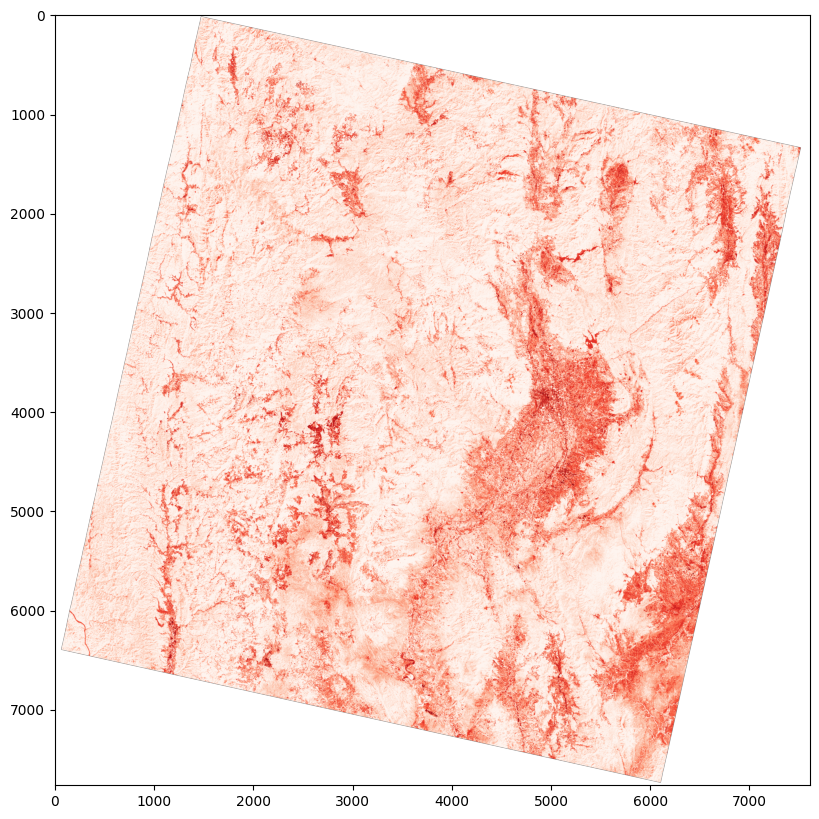

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(ndbi, cmap='Reds', vmin=-0.3, vmax=0.1)
plt.show()

Referring to each of __NDVI__, __NDWI__ and __NDBI__, they indicate in difference roles of representations. We can plot the histogram of land cover deensity by this

In [ ]:
plt.hist(ndvi.ravel(), bins=1000, color='green', alpha=0.5, label='Vegetation')
plt.hist(ndwi.ravel(), bins=1000, color='blue', alpha=0.5, label='Water body')
plt.hist(ndbi.ravel(), bins=1000, color='red', alpha=0.5, label='Built-up')
plt.xlim(-0.5, 0.5)

plt.xlabel('Index Value')
plt.ylabel('Counts')
plt.title('Histogram of Land Indicies')

plt.legend()

plt.show()

Additionally, calculating only any index is not end of analysis. Masking and saving image is last end of analysis that let the researcher requires to do

First, we should make the image to be binary since we filter only NDVI value is greater than a specific value like 0.3 as below

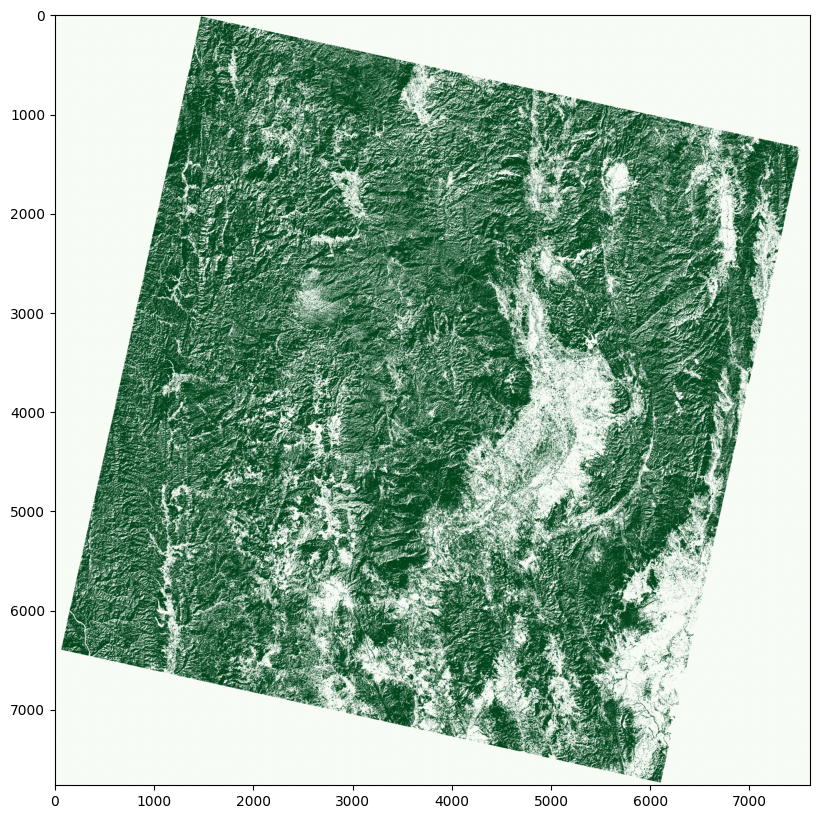

In [ ]:
vegetation_map = ndvi > 0.3

plt.figure(figsize=(10,10))
plt.imshow(vegetation_map, cmap='Greens')
plt.show()

Same to Water map, we can suppose to filter only greater than 0.0

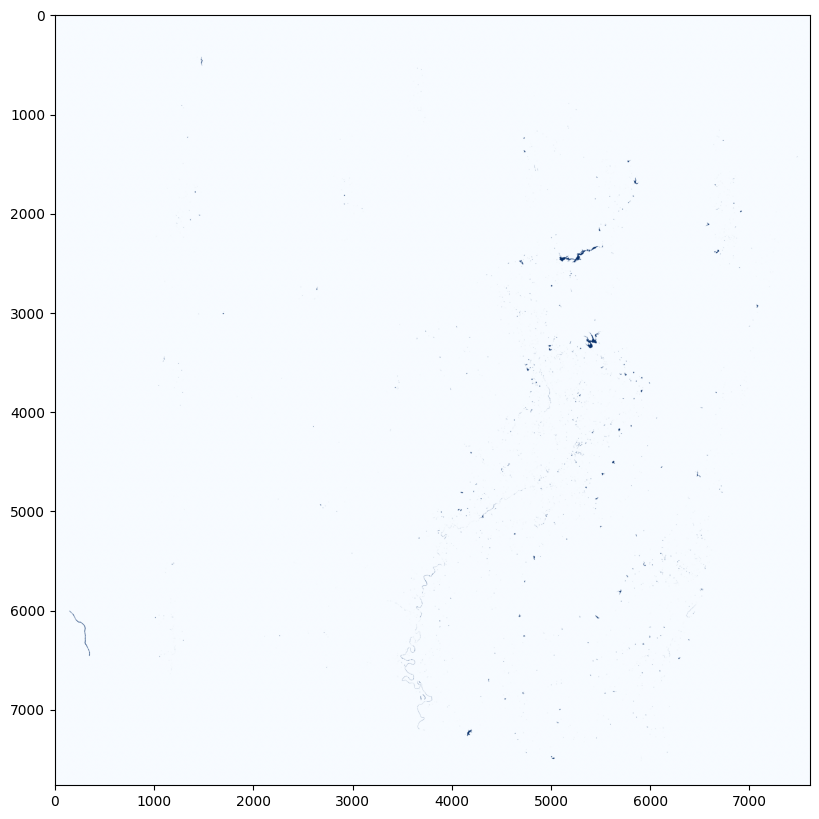

In [ ]:
water_map = ndwi > 0.0

plt.figure(figsize=(10,10))
plt.imshow(water_map, cmap='Blues')
plt.show()

Urban map we can masking the NDBI greater than -0.05

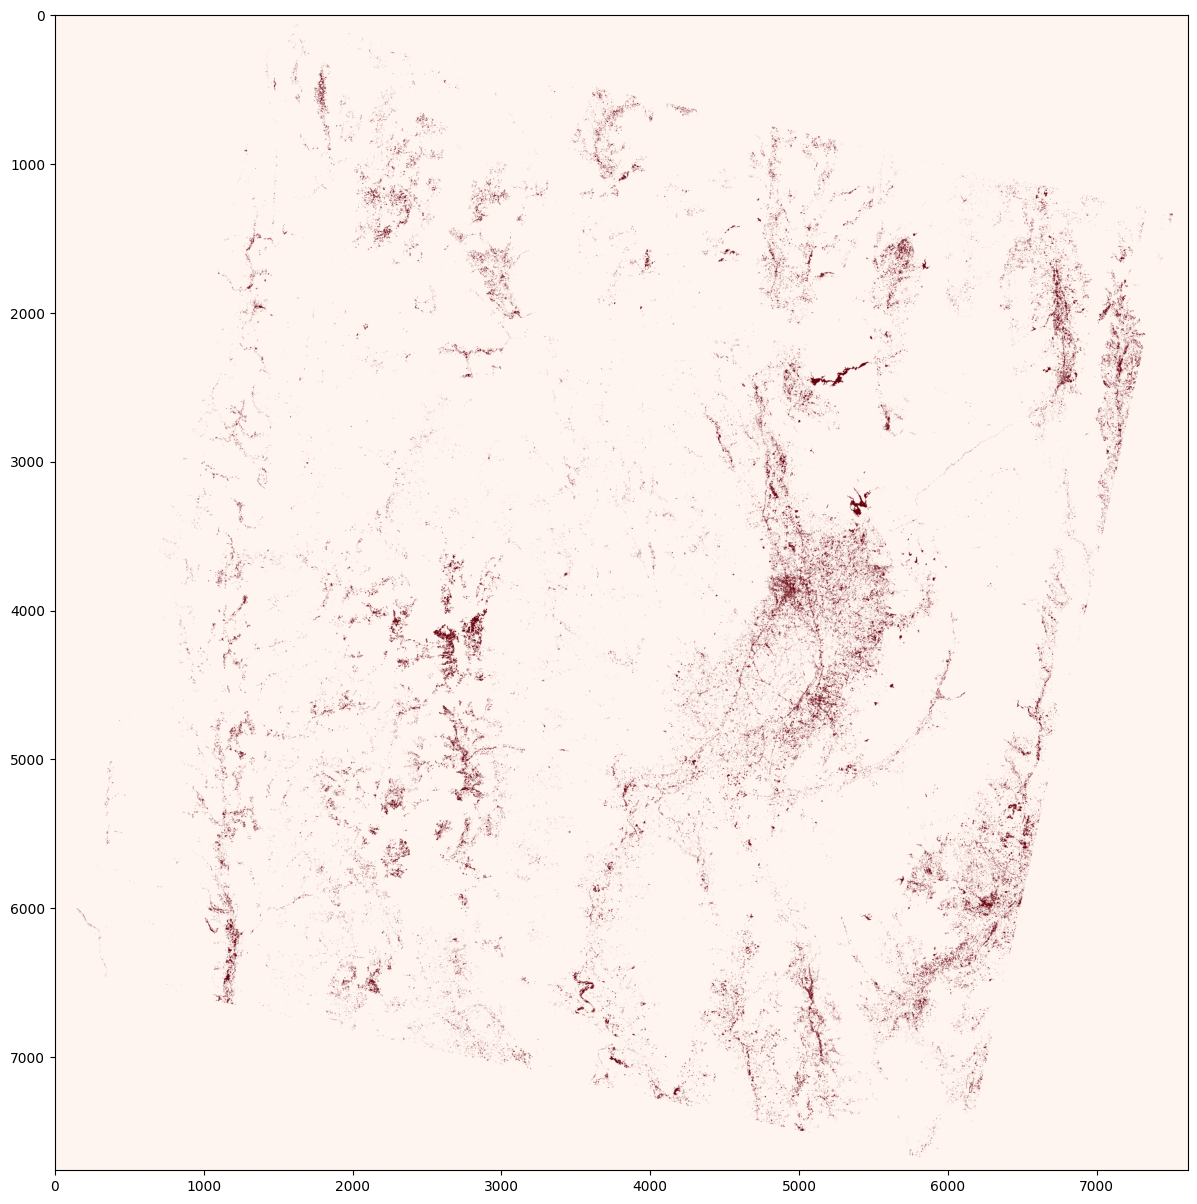

In [ ]:
urban_map = ndbi > -0.05

plt.figure(figsize=(15,15))
plt.imshow(urban_map, cmap='Reds')
plt.show()

To save the image, we can use this fucntion directly

In [ ]:
def save_image_tiff(file_path, image_data, image_profile):

    dtype = image_data.dtype

    dtype = np.byte if dtype == np.bool_ else dtype


    image_profile.update({"driver": "GTiff",
            "height": image_data.shape[0],
            "width": image_data.shape[1],
            "dtype": dtype})

    with rasterio.open(file_path, 'w', **image_profile) as dest:
        dest.set_band_description(1, 'Band 1')
        dest.write(image_data[np.newaxis,:,:])

    print(f'File save successfully')

Call the function. Please be noted that this implementation is for who clone th repository to local and savable local storage

In [ ]:
save_image_tiff('ndvi.tif', ndvi, profile)

File save successfully
